In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
import math
from svgpathtools import svg2paths, CubicBezier, QuadraticBezier, Line, Path

def ot_in_cartesian(x_val, y_val, z_val):
    # Define symbolic variables
    x, y, z = sp.symbols('x y z')

    # Express r and theta in terms of x, y, z
    r = sp.sqrt(x**2 + y**2)
    theta = sp.atan2(y, x)

    # Calculate the derivatives of theta with respect to x and y
    dtheta_dx = sp.diff(theta, x)
    dtheta_dy = sp.diff(theta, y)

    # Components of the differential form in cylindrical coordinates
    dx_component = r * sp.sin(r) * dtheta_dx
    dy_component = r * sp.sin(r) * dtheta_dy
    dz_component = sp.cos(r)

    # Substitute specific values and evaluate each component
    dx_component_substituted = dx_component.subs({x: x_val, y: y_val, z: z_val}).evalf()
    dy_component_substituted = dy_component.subs({x: x_val, y: y_val, z: z_val}).evalf()
    dz_component_substituted = dz_component.subs({x: x_val, y: y_val, z: z_val}).evalf()

    return [dx_component_substituted, dy_component_substituted, dz_component_substituted]


def get_basis(matrix, x_val, y_val, z_val):
    # Define symbolic variables x, y, z
    x, y, z = sp.symbols('x y z')

    # Convert the matrix elements to SymPy expressions
    matrix_sympy = [sp.sympify(element) for element in matrix]

    # For a matrix [a, b, c], the kernel is solved by ax + by + cz = 0
    a, b, c = matrix_sympy

    # Constructing the basis vectors
    basis1 = np.array([1, 0, -a/c], dtype=object) if c != 0 else np.array([1, 0, 0], dtype=object)
    basis2 = np.array([0, 1, -b/c], dtype=object) if c != 0 else np.array([0, 1, 0], dtype=object)

    # Function to substitute values into a symbolic expression or return the value if it's not symbolic
    def substitute_if_symbolic(expr, substitutions):
        return expr.subs(substitutions) if isinstance(expr, sp.Expr) else expr

    # Substituting the values of x, y, z
    substitutions = {x: x_val, y: y_val, z: z_val}
    basis1_evaluated = np.array([substitute_if_symbolic(el, substitutions) for el in basis1], dtype=float)
    basis2_evaluated = np.array([substitute_if_symbolic(el, substitutions) for el in basis2], dtype=float)

    return basis1_evaluated, basis2_evaluated


def plot_plane(ax, x, y, z, form, size=0.1, height_limit=0.3, surfcolor='blue', alpha=0.5):
    v1, v2 = get_basis(form, x, y, z)

    # Create a grid on the plane
    u, v = np.meshgrid(np.linspace(-size, size, 10), np.linspace(-size, size, 10))
    plane_x = x + u * v1[0] + v * v2[0]
    plane_y = y + u * v1[1] + v * v2[1]
    plane_z = z + u * v1[2] + v * v2[2]

    # Clamping the z-values to be within the height_limit
    plane_z = np.clip(plane_z, z - height_limit/2, z + height_limit/2)

    # Plot the plane
    ax.plot_surface(plane_x, plane_y, plane_z, color=surfcolor, alpha=alpha)


In [2]:
def knot1(ax, form, n):
    # Define the parametric equations for the knot
      t = np.linspace(0, 2*np.pi, 200)
      x = 3 * np.sin(t) * np.cos(t)
      y = np.cos(t)
      z = np.sin(t)**3

      ax.plot(x, y, z, color='b')

      # Take n equidistant points from t
      t = np.linspace(0, 2 * np.pi, n)
      x = 3 * np.sin(t) * np.cos(t)
      y = np.cos(t)
      z = np.sin(t)**3

      # Call plot_plane for these points
      for xi, yi, zi in zip(x, y, z):
          plot_plane(ax, xi, yi, zi, form, surfcolor='red')


def knot2(ax, form, n):
    # Define the parametric equations for the knot
      t = np.linspace(0, 2*np.pi, 200)
      x = np.cos(t)
      y = np.sin(2*t)
      z = 2/3 * np.sin(t)*np.cos(2*t) -4/3 * np.sin(2*t)*np.cos(t)

      ax.plot(x, y, z, color='b')

      # Take n equidistant points from t
      t = np.linspace(0, 2 * np.pi, n)
      x = np.cos(t)
      y = np.sin(2*t)
      z = 2/3 * np.sin(t)*np.cos(2*t) -4/3 * np.sin(2*t)*np.cos(t)

      # Call plot_plane for these points
      for xi, yi, zi in zip(x, y, z):
          plot_plane(ax, xi, yi, zi, form, surfcolor='red')


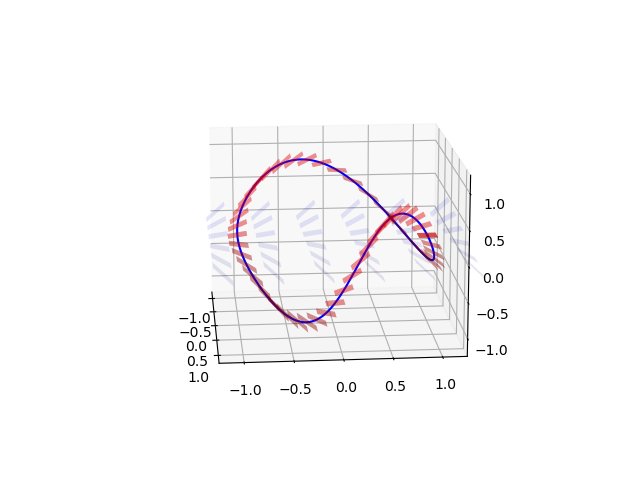

In [3]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

form = [0, 'x', 1]

# Generate a grid in the xy plane
grid_size = 1.2
step = 0.5
for x in np.arange(-grid_size, grid_size + step, step):
    for y in np.arange(-grid_size, grid_size + step, step):
        plot_plane(ax, x, y, 0, form, alpha=0.1)

knot1(ax, form, 50)

# Set plot limits
ax.view_init(elev=15, azim=-5)
ax.set_xlim([-grid_size, grid_size])
ax.set_ylim([-grid_size, grid_size])
ax.set_zlim([-grid_size, grid_size])

# Show the plot
plt.show()

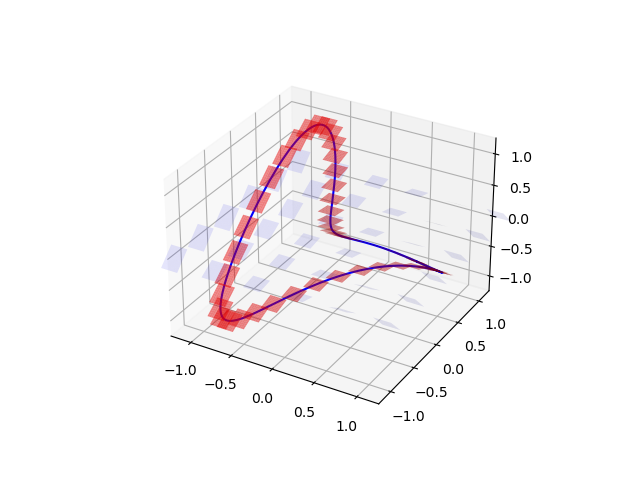

In [4]:

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate a grid in the xy plane
grid_size = 1.2
step = 0.5
for x in np.arange(-grid_size, grid_size + step, step):
    for y in np.arange(-grid_size, grid_size + step, step):
        plot_plane(ax, x, y, 0, form, alpha=0.1)

knot2(ax, form, 50)

# Set plot limits
ax.set_xlim([-grid_size, grid_size])
ax.set_ylim([-grid_size, grid_size])
ax.set_zlim([-grid_size, grid_size])

# Show the plot
plt.show()


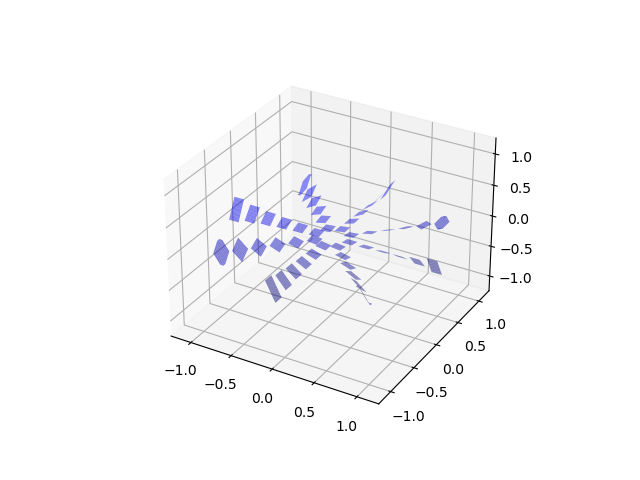

In [5]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Define the polar grid parameters
max_radius = 1.2
radius_step = 0.2
angle_step = math.pi / 4

# Generate the polar grid and convert to Cartesian coordinates
for r in np.arange(0.2, max_radius + radius_step, radius_step):
    for theta in np.arange(0, 2 * math.pi, angle_step):
        x = r * math.cos(theta)
        y = r * math.sin(theta)
        
        # Call the function with Cartesian coordinates
        ot_values = ot_in_cartesian(x, y, 0)

        # Plotting - Assuming 'ax' is predefined and 'plot_plane' is a function you have defined
        plot_plane(ax, x, y, 0, ot_values, alpha=0.5, size=0.06)


# Set plot limits
ax.set_xlim([-grid_size, grid_size])
ax.set_ylim([-grid_size, grid_size])
ax.set_zlim([-grid_size, grid_size])

# Show the plot
plt.show()

In [143]:
# Function to compute Bezier curve points
def bezier_curve(t, start, *controls, end):
    n = len(controls) + 1
    return sum(math.comb(n, k) * (1-t)**(n-k) * t**k * point for k, point in enumerate([start] + list(controls) + [end]))

def bezier_derivative(t, start, *controls, end):
    if len(controls) != 2:
        raise ValueError("Two control points are required for a cubic Bézier curve")

    P0, P1, P2, P3 = start, controls[0], controls[1], end

    # Derivative of cubic Bézier curve
    dP0 = -3 * (1 - t)**2 * P0
    dP1 = 3 * (1 - t)**2 * P1
    dP2 = -6 * t * (1 - t) * P1 + 6 * (1 - t) * t * P2
    dP3 = -3 * t**2 * P2 + 3 * t**2 * P3

    derivative = dP0 + dP1 + dP2 + dP3

    # Return the real and imaginary parts as the gradient components
    return  derivative


# Function to calculate the slope
def calculate_slope(derivative):
    return np.inf if np.isclose(derivative, 0) else derivative.imag / derivative.real

def distance(point1, point2):
    return np.sqrt((point1.real - point2.real) ** 2 + (point1.imag - point2.imag) ** 2)

def process_paths(svg_file, correction=True, threshold=0.1):
    paths, _ = svg2paths(svg_file)

    paths = [path for path in paths if path]

    first_points = []
    last_points = []
    curve_data = []

    # Extract first and last points of each path, including placeholders for empty paths
    for path in paths:
        first_points.append(path[0].start)
        last_points.append(path[-1].end)

    if correction:
        # Compare and adjust similar start and end points between paths
        for i in range(len(first_points)):
            for j in range(len(first_points)):
                if i == j:
                    continue  # Skip comparing the same path or with empty paths

                # Adjust start points with other start points
                if distance(first_points[i], first_points[j]) < threshold and distance(first_points[i], first_points[j]) > 0.00000001:
                    avg_point = (first_points[i] + first_points[j]) / 2
                    print("Correcting start point", first_points[i], " and start point", first_points[j], " to ", avg_point)
                    first_points[i], first_points[j] = avg_point, avg_point

                # Adjust end points with other end points
                if distance(last_points[i], last_points[j]) < threshold and distance(last_points[i], last_points[j]) > 0.00000001:
                    avg_point = (last_points[i] + last_points[j]) / 2
                    print("Correcting end point", last_points[i], " and end point", last_points[j], " to ", avg_point)
                    last_points[i], last_points[j] = avg_point, avg_point

                # Adjust start points with other end points
                if distance(first_points[i], last_points[j]) < threshold and distance(first_points[i], last_points[j]) > 0.00000001:
                    avg_point = (first_points[i] + last_points[j]) / 2
                    print("Correcting start point", first_points[i], " and end point", last_points[j], " to ", avg_point)
                    first_points[i], last_points[j] = avg_point, avg_point

                # Adjust end points with other start points
                if distance(last_points[i], first_points[j]) < threshold and distance(last_points[i], first_points[j]) > 0.00000001:
                    avg_point = (last_points[i] + first_points[j]) / 2
                    print("Correcting end point", last_points[i], " and start point", first_points[j], " to ", avg_point)
                    last_points[i], first_points[j] = avg_point, avg_point

        # Update paths with adjusted points and control points
        adjusted_paths = []
        path_index = 0  # Track index for first_points and last_points
        for path in paths:
            new_path = []
            for i, segment in enumerate(path):
                is_first_segment = i == 0
                is_last_segment = i == len(path) - 1
        
                if is_first_segment:
                    # Adjusting the first segment of each path
                    if isinstance(segment, CubicBezier):
                        new_control1 = complex(segment.control1.real, first_points[path_index].imag)
                        # print("First adjusted: ", first_points[path_index])
                        new_segment = CubicBezier(start=first_points[path_index], 
                                                  control1=new_control1, 
                                                  control2=segment.control2, 
                                                  end=segment.end if not is_last_segment else last_points[path_index])
                    elif isinstance(segment, Line):
                        new_segment = Line(start=first_points[path_index], end=segment.end if not is_last_segment else last_points[path_index])
                    new_path.append(new_segment)
        
                if is_last_segment and not is_first_segment:
                    # Adjusting the last segment of each path, but only if it's not also the first segment
                    if isinstance(segment, CubicBezier):
                        new_control2 = complex(segment.control2.real, last_points[path_index].imag)
                        # print("Last adjusted: ", last_points[path_index])
                        new_segment = CubicBezier(start=segment.start, 
                                                  control1=segment.control1, 
                                                  control2=new_control2, 
                                                  end=last_points[path_index])  # Adjusted end point
                    elif isinstance(segment, Line):
                        new_segment = Line(start=segment.start, end=last_points[path_index])  # Adjusted end point
                    new_path.append(new_segment)
        
                if not is_first_segment and not is_last_segment:
                    # For all other segments
                    new_path.append(segment)
        
            adjusted_paths.append(Path(*new_path))
            path_index += 1
        
    else:
        adjusted_paths = paths

    # Clear curve_data before processing adjusted paths
    curve_data.clear()
    # Process adjusted paths
    for path in adjusted_paths:
        
        for segment in path:
            t_values = np.linspace(0, 1, 100)
            if isinstance(segment, CubicBezier):
                # If the segment is a cubic bezier, calculate curve points and derivatives
                controls = segment.control1, segment.control2
                curve_points = np.array([bezier_curve(t, segment.start, *controls, end=segment.end) for t in t_values])
                derivative_points = np.array([bezier_derivative(t, segment.start, *controls, end=segment.end) for t in t_values])
            elif isinstance(segment, Line):
                # If the segment is a line, calculate points and a constant derivative
                controls = ()
                curve_points = np.array([bezier_curve(t, segment.start, end=segment.end) for t in t_values])
                derivative = segment.end - segment.start
                derivative_points = np.array([derivative] * len(t_values))
            else:
                # Handle other segment types or raise an error
                print("Error. Script can only handle linear and cubic Beziers")
                continue
            
            curve_data.append((curve_points, derivative_points))
    
    return curve_data



Correcting start point (2.1660366+3.0810005j)  and start point (2.1746593+3.0731208j)  to  (2.17034795+3.07706065j)
Correcting end point (7.0827326+3.0673528j)  and end point (7.0772824+3.0669851j)  to  (7.0800075+3.06716895j)
Correcting end point (7.1149461+5.121077j)  and end point (7.0999191+5.1199255j)  to  (7.1074326+5.12050125j)
Correcting start point (2.2183501+5.0722542j)  and start point (2.2223728+5.0735897j)  to  (2.22036145+5.07292195j)


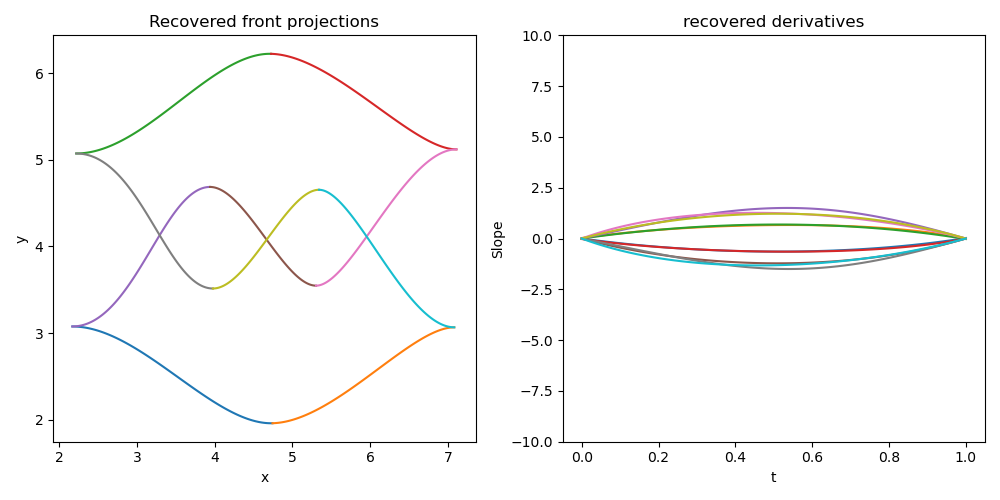

In [153]:
# Load and process the SVG file
svg_file = './bitmap1.svg'  # Replace with your SVG file path
curve_data = process_paths(svg_file, threshold=1)

# Plotting
fig = plt.figure(figsize=(10, 5))

# First subplot for the curve
plt.subplot(1, 2, 1)
for curve_points, _ in curve_data:
    plt.plot(curve_points.real, curve_points.imag)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Recovered front projections')

# Second subplot for the slope
plt.subplot(1, 2, 2)
for _, derivative_points in curve_data:
    t_values = np.linspace(0, 1, 100)
    slope_values = [calculate_slope(derivative) for derivative in derivative_points]
    plt.plot(t_values, slope_values)

plt.xlabel('t')
plt.ylabel('Slope')
plt.title('recovered derivatives')
plt.ylim(-10, 10)

plt.tight_layout()
plt.show()

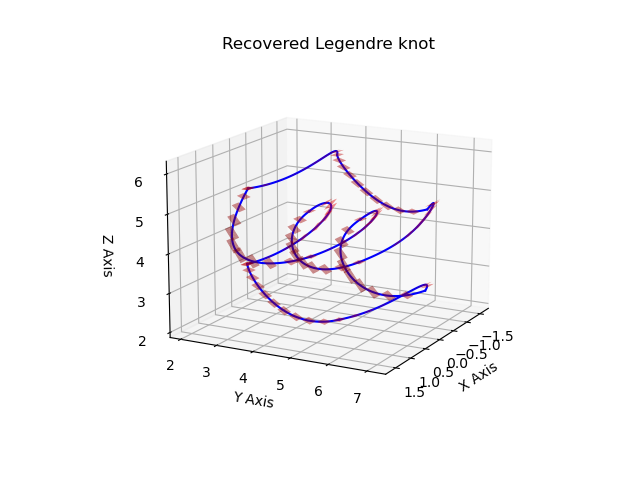

In [154]:
# 3D Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for curve_points, derivative_points in curve_data:
    # Calculating -dz/dy
    y = curve_points.real
    z = curve_points.imag
    # Calculating -dz/dy
    x = [-calculate_slope(derivative) for derivative in derivative_points]  # x component is -dz/dy

    ax.plot(x, curve_points.real, curve_points.imag, color="blue")
    x = [x[int(i * len(x) / 10)] for i in range(10)]
    y = [y[int(i * len(y) / 10)] for i in range(10)]
    z = [z[int(i * len(z) / 10)] for i in range(10)]
    for xi, yi, zi in zip(x, y, z):
        plot_plane(ax, xi, yi, zi, form, surfcolor='red')

ax.view_init(elev=15, azim=28)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Recovered Legendre knot')

plt.show()